In [1]:
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("vgsales.csv")
data.index += 1
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.drop("Rank", axis = 1, inplace = True)

In [6]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
data["Year"] = data["Year"].astype(int)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
data.nunique()

Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 1 to 16598
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


In [21]:
data.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [22]:
data.dropna(inplace = True)

In [23]:
data.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

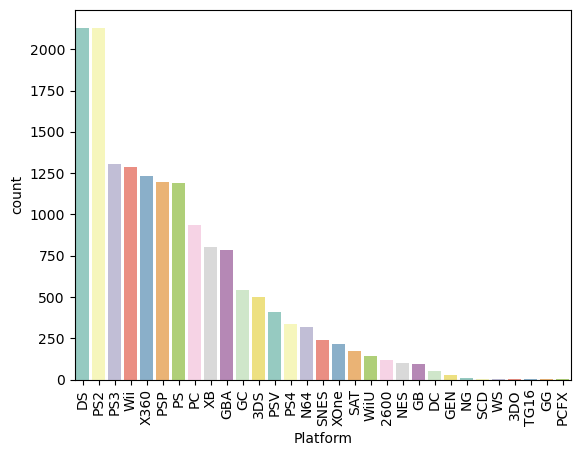

In [32]:
sb.countplot(x = 'Platform', data = data, order = data['Platform'].value_counts().index, palette = 'Set3');
plt.xticks(rotation = 90)
plt.show()

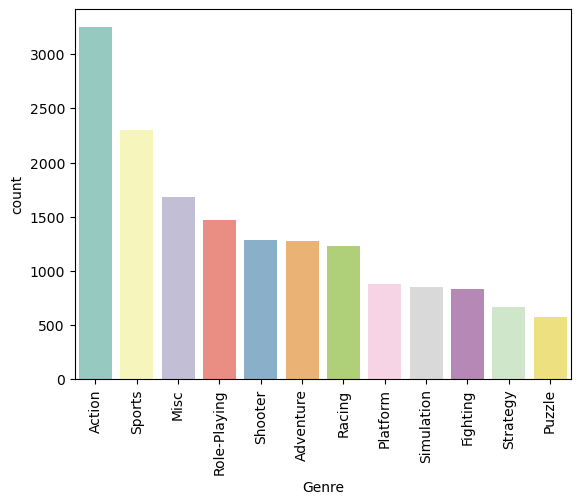

In [33]:
sb.countplot(x = 'Genre', data = data, order = data['Genre'].value_counts().index, palette = 'Set3');
plt.xticks(rotation = 90)
plt.show()

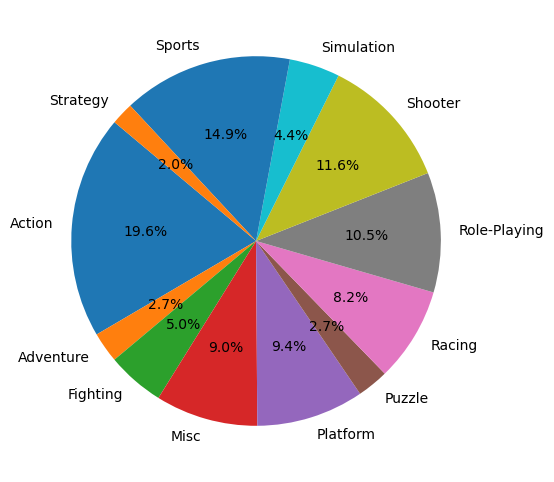

In [49]:
genre_sales = data.groupby('Genre')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
plt.pie(genre_sales, labels = genre_sales.index, autopct = '%1.1f%%', startangle = 140)
plt.show()

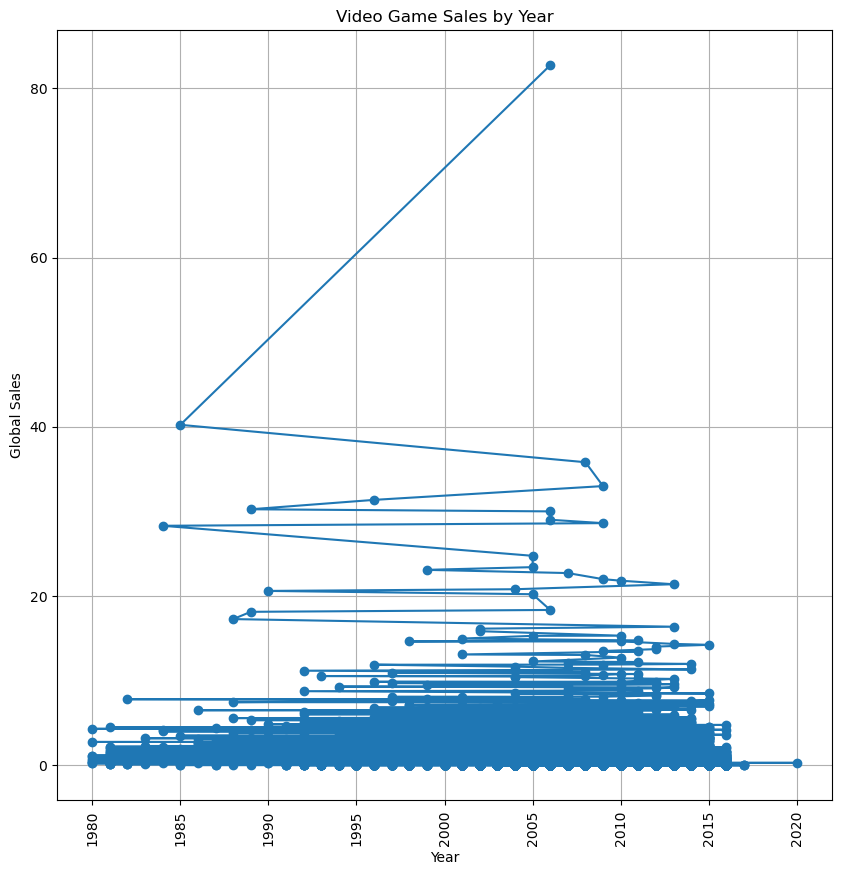

In [52]:
plt.figure(figsize=(10, 10))
plt.plot(data['Year'], data['Global_Sales'], marker='o', linestyle='-')
plt.title('Video Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

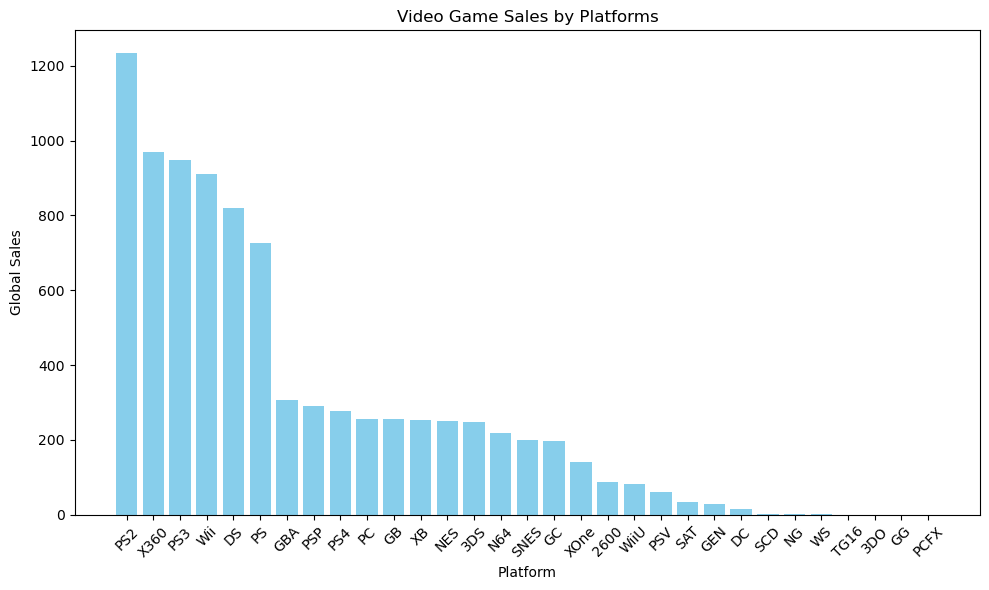

In [54]:
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize = (10, 6))
plt.bar(platform_sales.index, platform_sales.values, color = 'skyblue')

plt.title('Video Game Sales by Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [56]:
NA_sales = data["NA_Sales"].sum()
EU_sales = data["EU_Sales"].sum()
JP_sales = data["JP_Sales"].sum()
Other_sales = data["Other_Sales"].sum()
Global_sales = data["Global_Sales"].sum()

In [57]:
NA_percentange = NA_sales / Global_sales
EU_percentange = EU_sales / Global_sales
JP_percentange = JP_sales / Global_sales
Other_percentangle = Other_sales / Global_sales

In [59]:
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sizes = [NA_percentange, EU_percentange, JP_percentange, Other_percentangle]

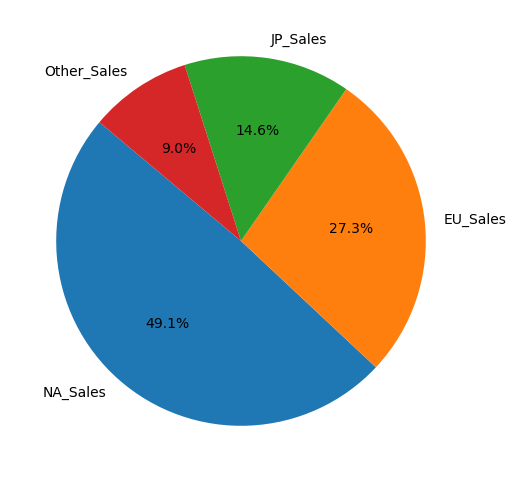

In [61]:
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 140)
plt.show()